In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from nanograd.viz import draw_dot

In [4]:
class Tensor:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._children = _children
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f'Tensor({self.data}, label={self.label})'

    @staticmethod
    def new(data):
        if not isinstance(data, Tensor):
            data = Tensor(data)
        return data
    
    @staticmethod
    def grad_fn(parent):
        pass

    @staticmethod
    def add_backward(parent):
        for child in parent._children:
            child.grad += 1 * parent.grad

    @staticmethod
    def mul_backward(parent):
        ch1, ch2 = parent._children
        ch1.grad += ch2.data * parent.grad
        ch2.grad += ch1.data * parent.grad

    @staticmethod
    def tanh_backward(parent):
        child, = parent._children
        child.grad += (1 - parent.data ** 2) * parent.grad

    def __add__(self, other):
        other = self.new(other)
        ret = Tensor(self.data + other.data,
                     _children=(self, other),
                     _op='+')
        ret.grad_fn = self.add_backward
        return ret
    
    def __mul__(self, other):
        other = self.new(other)
        ret = Tensor(self.data * other.data,
                     _children=(self, other),
                     _op='*')
        ret.grad_fn = self.mul_backward
        return ret
    
    def tanh(self):
        x = self.data
        ret = Tensor((math.exp(2*x)-1)/(math.exp(2*x)+1),
                     _children=(self,),
                     _op='tanh')
        ret.grad_fn = self.tanh_backward
        return ret
    
    def traverse(self):
        nodes = []
        found = set()

        def _gather(parent):
            if parent in found:
                return
            found.add(parent)
            nodes.append(parent)  
            for _child in parent._children:
                _gather(_child)

        _gather(self)
        return nodes
        
    def backward(self):
        self.grad = 1.0
        for node in self.traverse():
            node.grad_fn(node) 



In [5]:
a = Tensor(2.0, label='a')
b = Tensor(-3.0, label='b')
e = a * b; e.label='e'
c = Tensor(10.0, label='c')
d = e + c; d.label='d'
f = Tensor(-2.0, label='f')
L = f * d; L.label='L'
L.backward()


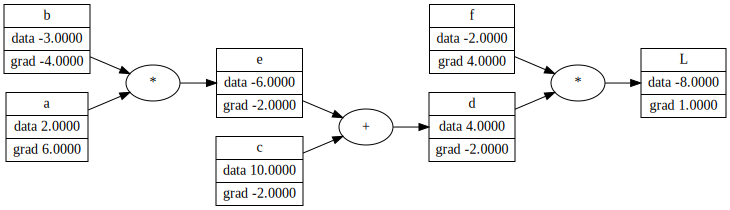

In [6]:
draw_dot(L)

In [7]:
L.grad = 1
f.grad = d.data * L.grad
d.grad = f.data * L.grad
c.grad = 1 * d.grad
e.grad = 1 * d.grad
a.grad = b.data * e.grad
b.grad = a.data * e.grad



In [8]:
def lol():
    h = 0.0001
    a = Tensor(2.0, label='a')
    b = Tensor(-3.0, label='b')
    e = a * b; e.label='e'
    c = Tensor(10.0, label='c')
    d = e + c; d.label='d'
    f = Tensor(-2.0, label='f')
    L1 = f * d; L.label='L'

    a = Tensor(2.0, label='a')
    b = Tensor(-3.0, label='b')
    e = a * b; e.label='e'
    c = Tensor(10.0, label='c')
    d = e + c; d.label='d'
    f = Tensor(-2.0, label='f')
    L2 = f * d; L.label='L'
    L2 = L2 + h

    print((L1.data-L2.data)/h)

lol()

-0.9999999999976694


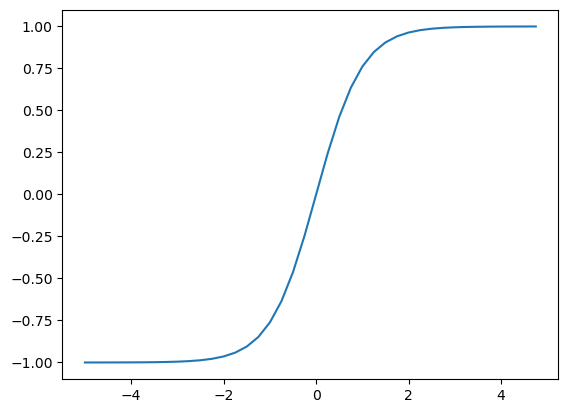

In [9]:
plt.plot(np.arange(-5, 5, 0.25), np.tanh(np.arange(-5, 5, 0.25)))
plt.show()

In [10]:
# input x1, x2
x1 = Tensor(2.0, label='x1')
x2 = Tensor(0.0, label='x2')
# weights w1, w2
w1 = Tensor(-3.0, label='w1')
w2 = Tensor(1.0, label='w2')
# bias b
b = Tensor(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1' 
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 * x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

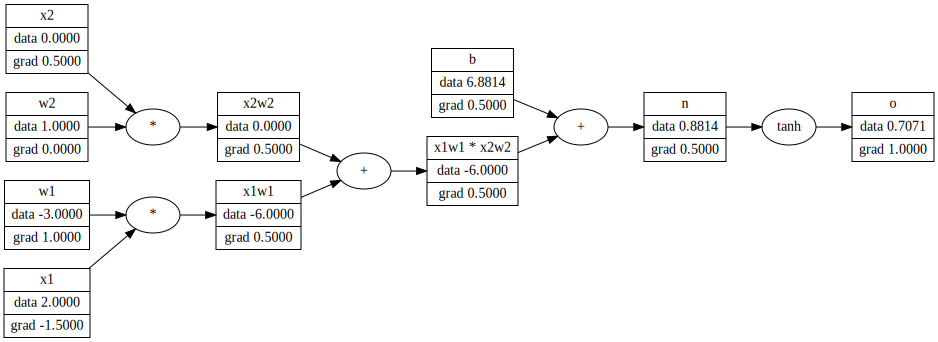

In [11]:
draw_dot(o)

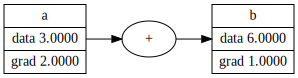

In [12]:
a = Tensor(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b) 

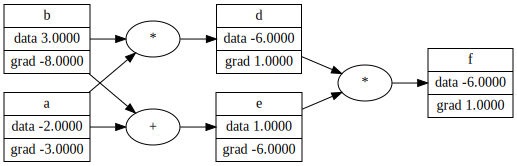

In [13]:
a = Tensor(-2.0, label='a')
b = Tensor(3.0, label='b')
d = a * b ; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'
f.backward()
draw_dot(f) 

In [14]:
a = math.e
x = 2
h = 0.000001
y = a ** x
y1 = a ** (x+h)
print(y)
print((y1-y)/h)



7.3890560989306495
7.38905979424942


WORKING
Scalar(6.0)
Scalar(3.0)


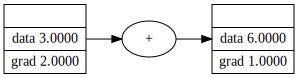

In [1]:
from nanograd import Scalar
from nanograd.viz import draw_dot

a = Scalar(3.0)
b = a + a
b.backward()
draw_dot(b)

In [1]:
bool(-1)

True

In [3]:
3.14/3.14
-3.14/-3.14

1.0

-6.0000
1.0000
1.0000


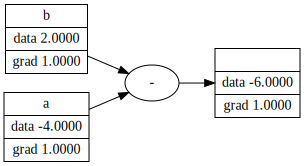

In [8]:
import nanograd
from nanograd.viz import draw_dot

a = nanograd.Scalar(-4.0, label='a')
b = nanograd.Scalar(2.0, label='b')
c = a - b

print(f"{c.data:.4f}")  # prints 24.7041, the outcome of this forward pass
c.backward()
print(f"{a.grad:.4f}")  # prints 138.8338, i.e. the numerical value of dg/da
print(f"{b.grad:.4f}")  # prints 645.5773, i.e. the numerical value of dg/db
draw_dot(c)

In [1]:
from nanograd import Scalar
import random

In [11]:
class Neuron:
    def __init__(self, n_inputs):
        self.weights = [Scalar(random.uniform(-1, 1)) for _ in range(n_inputs)]
        self.bias = Scalar(random.uniform(-1, 1))

    def __call__(self, x):
       logits = sum((wi*xi for wi, xi in zip(self.weights, x)), self.bias)
       return logits.tanh()
    
    def parameters(self):
        return self.weights + [self.bias]
    
class Layer:
    def __init__(self, n_inputs, n_output):
        self.neurons = [Neuron(n_inputs=n_inputs) for _ in range(n_output)]

    def __call__(self, x):
        return [n(x) for n in self.neurons]
    
    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]
    
class MLP:
    def __init__(self, n_inputs, n_layers):
        _n_layers = [n_inputs] + list(n_layers)
        self.layers = [Layer(n_inputs=_n_layers[i], n_output=_n_layers[i+1])
                        for i in range(len(n_layers))]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x[0] if len(x) == 1 else x
    
    def parameters(self):
        return [p for l in self.layers for p in l.parameters()]

In [103]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
mlp = MLP(n_inputs=3, n_layers=(4, 4, 1))

In [104]:
for _ in range(20):
    pred = [mlp(x) for x in xs]
    loss = sum((gth-prd)**2 for gth,prd in zip(ys, pred))
    loss.zero_grad()
    loss.backward()
    lr = 0.1

    for p in mlp.parameters():
        p.data -= p.grad * lr
    print(loss)
print(pred)

Scalar(7.584063631845523)
Scalar(6.641160301700207)
Scalar(4.622646682104341)
Scalar(3.0593959445677488)
Scalar(2.6984094123957307)
Scalar(2.1499375500198785)
Scalar(1.2143251964186514)
Scalar(0.9681452855328194)
Scalar(0.3217110292596289)
Scalar(0.13430038153298895)
Scalar(0.11256998119677636)
Scalar(0.09670418336339423)
Scalar(0.084617137600876)
Scalar(0.07511530778954381)
Scalar(0.06745890395541593)
Scalar(0.061164419421548696)
Scalar(0.05590267435157776)
Scalar(0.0514419834808052)
Scalar(0.04761468394521451)
Scalar(0.04429653788412999)
[Scalar(0.9061530641735154), Scalar(-0.9120007127724299), Scalar(-0.8820014415762888), Scalar(0.8824340347827004)]


In [107]:
random.uniform(-1, 1)

-0.3115573265863749